In [59]:
from sklearn.datasets import make_regression
import numpy as np
from sklearn.model_selection import cross_val_score

In [60]:
x,y = make_regression(n_samples=4, n_features=1, n_informative=1,n_targets=1,noise=100,random_state=13)

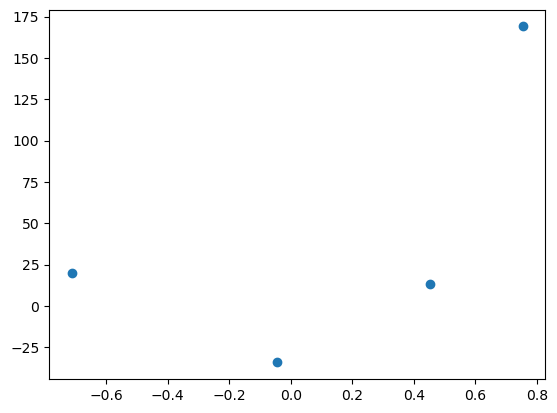

In [61]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [62]:
# let apply ols(ordinary list square)
from sklearn.linear_model import LinearRegression

In [63]:
reg = LinearRegression()

In [64]:
reg.fit(x,y)

LinearRegression()

In [65]:
reg.coef_

array([82.71223428])

In [66]:
reg.intercept_

32.69954105391578

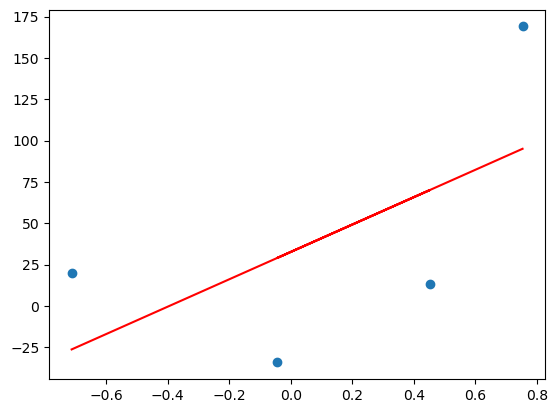

In [67]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red')

In [68]:
reg.predict(x)

array([-26.22388228,  70.06994907,  29.01859201,  95.04524236])

In [69]:
# lets apply assuming slope is constant =82.71
# and assuming that the value of intercept b=0
b=0
y_pred = ((82.71*x)+b).reshape(4)

In [70]:
y_pred

array([-58.92183166,  37.36939854,  -3.68084961,  62.34401718])

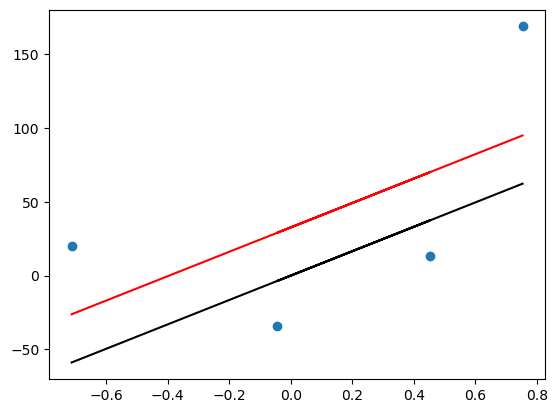

In [71]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='ols')
plt.plot(x,y_pred,color='black',label='b=0')
plt.legend
plt.show()

In [72]:
m=82.71
lr=0.1
b=0
# calculate slope at b=0
loss_slope = - 2*np.sum(y-m*x.ravel()-b)
loss_slope
# bnew = bold-lr*m
# step_size = lr*m

-261.59833340734684

In [73]:
lr=0.1
step_size = lr*loss_slope
step_size

-26.159833340734686

In [74]:
b = b-step_size

In [75]:
b

26.159833340734686

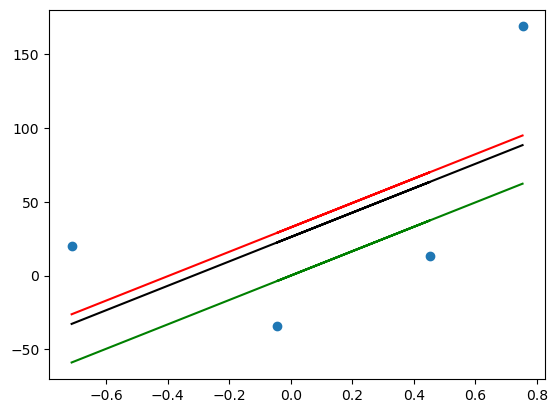

In [76]:
y_pred1 = ((82.71*x)+b).reshape(4)

plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='ols')
plt.plot(x,y_pred,color='green',label='b=0')
plt.plot(x,y_pred1,color='black',label='b=0')
plt.legend
plt.show()


In [77]:
# again iterate
m=82.71
lr=0.1
loss_slope = -2*np.sum(y-m*x.ravel()-b)
loss_slope

-52.319666681469386

In [78]:
step_size = lr*loss_slope
step_size

-5.231966668146939

In [79]:
b=b-step_size
b

31.391800008881624

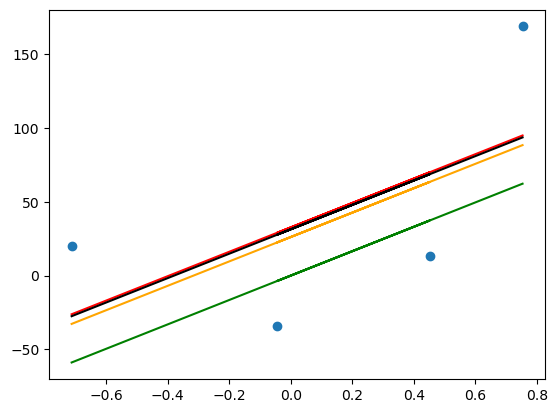

In [80]:
y_pred2 = ((82.71*x)+b).reshape(4)

plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red',label='ols')
plt.plot(x,y_pred,color='green',label='b=0')
plt.plot(x,y_pred1,color='orange',label='b=0')
plt.plot(x,y_pred2,color='black',label='b=0')
plt.legend
plt.show()

32.699791675918355

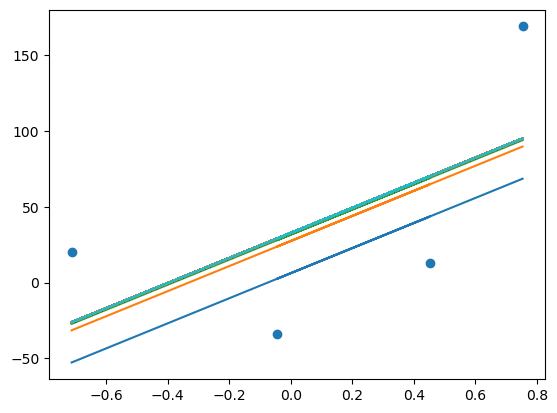

In [81]:
b=-100
m=82.71
lr=0.1
epoches=100
for i in range(epoches):
    loss_scope = -2*np.sum(y-m*x.ravel()-b)
    b = b -lr*loss_scope
    y_pred = m*x+b
    plt.plot(x,y_pred)
plt.scatter(x,y)
b

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lr = LinearRegression()

In [84]:
lr.fit(x,y)
print(lr.coef_)
print(lr.intercept_)

[82.71223428]
32.69954105391578


In [97]:
np.mean(cross_val_score(lr,x,y,scoring='r2',cv=4))

C:\Users\amank\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\amank\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\amank\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\amank\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [92]:
class GDRegressor:

    def __init__(self,learning_rate,epoches):
        self.b=0
        self.m=82.71
        self.learning_rate=learning_rate
        self.epochs=epoches
    def fit(self,x,y):
        for i in range(self.epochs):
            loss_scope_b = -2*np.sum(y-self.m*x.ravel()-self.b)
            loss_scope_m = -2*np.sum(y-self.m*x.ravel()-self.b)*(x)
            self.b = self.b-self.learning_rate*loss_scope_b
            self.m = self.m - self.learning_rate*loss_scope_m
            # print(self.b)
        print(self.b)
        print(self.m)
    

In [93]:
gd = GDRegressor(0.1,100)

In [94]:
gd.fit(x,y)

2.9331310152360915e+35
[[-2.08953515e+35]
 [ 1.32522478e+35]
 [-1.30533359e+34]
 [ 2.21089554e+35]]
